In [1]:
import tensorflow as tf
import pathlib
import random
import os
import IPython.display as display
import matplotlib.pyplot as plt
import time

# 加载数据

In [2]:
data_root_orig = tf.keras.utils.get_file(origin='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
                                         fname='flower_photos',
                                         untar=True)

In [3]:
print(data_root_orig)

/home/kdd/.keras/datasets/flower_photos


In [4]:
type(data_root_orig)

str

In [5]:
# 将数据路径转成pathlib对象迭代器
data_root = pathlib.Path(data_root_orig)
print(data_root)

/home/kdd/.keras/datasets/flower_photos


In [6]:
type(data_root)

pathlib.PosixPath

In [7]:
# 查看data_root下所有文件和文件夹
for iterm in data_root.iterdir():
    print(iterm)

/home/kdd/.keras/datasets/flower_photos/tulips
/home/kdd/.keras/datasets/flower_photos/sunflowers
/home/kdd/.keras/datasets/flower_photos/dandelion
/home/kdd/.keras/datasets/flower_photos/daisy
/home/kdd/.keras/datasets/flower_photos/roses
/home/kdd/.keras/datasets/flower_photos/LICENSE.txt


## 准备图像数据

In [8]:
# 查询data_root下所有文件夹下的所有文件[所有的图像]
data_root.glob('*/*')

<generator object Path.glob at 0x7fc24692b6d0>

In [9]:
# 所有图像路径
all_images_path = list(data_root.glob('*/*'))
all_images_path = [str(path) for path in all_images_path]
random.shuffle(all_images_path)

In [10]:
all_images_path[0]

'/home/kdd/.keras/datasets/flower_photos/dandelion/14065420729_9b388bf7cb_m.jpg'

## 准备标签数据

In [11]:
(data_root/'LICENSE.txt'), data_root/'LICENSE.txt'

(PosixPath('/home/kdd/.keras/datasets/flower_photos/LICENSE.txt'),
 PosixPath('/home/kdd/.keras/datasets/flower_photos/LICENSE.txt'))

In [12]:
attrbutions = (data_root/'LICENSE.txt').open(encoding='utf-8').readlines()[4:]

In [13]:
attrbutions[:5]

['daisy/7568630428_8cf0fc16ff_n.jpg CC-BY by A Guy Taking Pictures - https://www.flickr.com/photos/80901381@N04/7568630428/\n',
 'daisy/7410356270_9dff4d0e2e_n.jpg CC-BY by martinak15 - https://www.flickr.com/photos/martinaphotography/7410356270/\n',
 'daisy/4286053334_a75541f20b_m.jpg CC-BY by jenny downing - https://www.flickr.com/photos/jenny-pics/4286053334/\n',
 'daisy/10770585085_4742b9dac3_n.jpg CC-BY by Thangaraj Kumaravel - https://www.flickr.com/photos/kumaravel/10770585085/\n',
 'daisy/8759177308_951790e00d_m.jpg CC-BY by Marina del Castell - https://www.flickr.com/photos/marinadelcastell/8759177308/\n']

In [14]:
attrbutions = [line.split(' CC-BY') for line in attrbutions]

In [15]:
attrbutions[:5]

[['daisy/7568630428_8cf0fc16ff_n.jpg',
  ' by A Guy Taking Pictures - https://www.flickr.com/photos/80901381@N04/7568630428/\n'],
 ['daisy/7410356270_9dff4d0e2e_n.jpg',
  ' by martinak15 - https://www.flickr.com/photos/martinaphotography/7410356270/\n'],
 ['daisy/4286053334_a75541f20b_m.jpg',
  ' by jenny downing - https://www.flickr.com/photos/jenny-pics/4286053334/\n'],
 ['daisy/10770585085_4742b9dac3_n.jpg',
  ' by Thangaraj Kumaravel - https://www.flickr.com/photos/kumaravel/10770585085/\n'],
 ['daisy/8759177308_951790e00d_m.jpg',
  ' by Marina del Castell - https://www.flickr.com/photos/marinadelcastell/8759177308/\n']]

In [16]:
# 生成picture:author字典
attrbutions = dict(attrbutions)

In [17]:
pathlib.Path(all_images_path[0])

PosixPath('/home/kdd/.keras/datasets/flower_photos/dandelion/14065420729_9b388bf7cb_m.jpg')

In [18]:
pathlib.Path(all_images_path[0]).relative_to(data_root)

PosixPath('dandelion/14065420729_9b388bf7cb_m.jpg')

In [19]:
str(pathlib.Path(all_images_path[0]).relative_to(data_root))

'dandelion/14065420729_9b388bf7cb_m.jpg'

In [20]:
attrbutions[str(pathlib.Path(all_images_path[0]).relative_to(data_root))]

' by Thomas - https://www.flickr.com/photos/boretom/14065420729/\n'

## 展示图片

In [21]:
def caption_image(image_path):
    '''显示图片及其作者'''
    image_rel = pathlib.Path(image_path).relative_to(data_root)
    return "Image (CC BY 2.0)" + ' - '.join(attrbutions[str(image_rel)].split(' - ')[:-1])

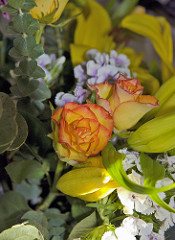

Image (CC BY 2.0) by Berit Watkin



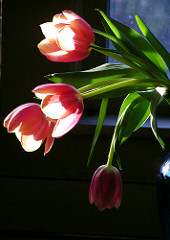

Image (CC BY 2.0) by liz west



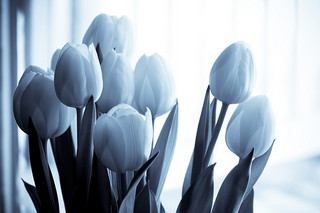

Image (CC BY 2.0) by Sharon Mollerus



In [22]:
for n in range(3):
    image_path = random.choice(all_images_path)
    display.display(display.Image(image_path))
    print(caption_image(image_path))
    print()

In [23]:
caption_image(all_images_path[0])

'Image (CC BY 2.0) by Thomas'

## 生成标签索引字典

In [24]:
attrbutions[str(pathlib.Path(all_images_path[0]).relative_to(data_root))].split(' - ')[:-1]

[' by Thomas']

In [25]:
for i in data_root.glob('*/'):
    if i.is_dir():
        print(i.name)

tulips
sunflowers
dandelion
daisy
roses


In [26]:
label_names = sorted([item.name for item in data_root.glob('*/') if item.is_dir()])
label_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [27]:
label_to_index = dict((label, index) for index, label in enumerate(label_names))
label_to_index

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

In [28]:
all_image_labels = [label_to_index[pathlib.Path(path).parent.name] for path in all_images_path]
print("First 10 labels indices: ", all_image_labels[:10])

First 10 labels indices:  [1, 0, 0, 3, 1, 2, 3, 3, 0, 1]


## 读取处理图片数据

In [29]:
img_path = all_images_path[0]
img_raw = tf.io.read_file(img_path)
print(repr(img_raw)[:100]+'......')

<tf.Tensor: shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00......


In [30]:
img_tensor = tf.image.decode_jpeg(img_raw)
print(img_tensor.shape)
print(img_tensor.dtype)

(240, 240, 3)
<dtype: 'uint8'>


In [31]:
img_final = tf.image.resize(img_tensor, [192, 192])
img_final = img_final/255.0
print(img_final.shape)
print(img_final.numpy().min())
print(img_final.numpy().max())

(192, 192, 3)
0.0
0.999326


In [32]:
def preprocess_image(image):
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [192,192])
    image /= 255.0
    return image

In [33]:
def load_and_preprocess(path):
    image = tf.io.read_file(path)
    return preprocess_image(image)

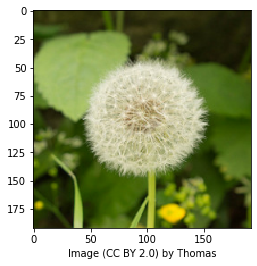

In [34]:
image_path =all_images_path[0]
label = all_image_labels[0]
plt.imshow(load_and_preprocess(img_path))
plt.grid(False)
plt.xlabel(caption_image(img_path))
print()

In [35]:
all_images_path[0]

'/home/kdd/.keras/datasets/flower_photos/dandelion/14065420729_9b388bf7cb_m.jpg'

## 构建Dataset【path dataset-->image dataset-->(image, label) dataset】

In [36]:
path_ds = tf.data.Dataset.from_tensor_slices(all_images_path)

In [37]:
image_ds = path_ds.map(load_and_preprocess)

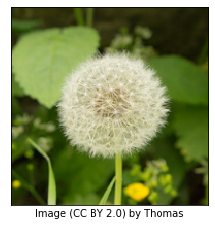

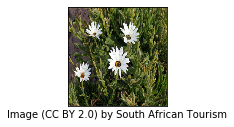

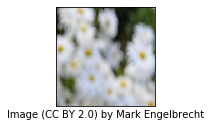

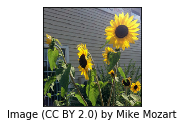

In [38]:
plt.figure(figsize=(8,8))
for i, image in enumerate(image_ds.take(4)):
    plt.subplot(2, 2, i+1)
    plt.imshow(image)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(caption_image(all_images_path[i]))
    plt.show()

In [39]:
label_ds = tf.data.Dataset.from_tensor_slices(tf.cast(all_image_labels, tf.int64))

In [40]:
for label in label_ds.take(4):
    print(label_names[label.numpy()])

dandelion
daisy
daisy
sunflowers


In [41]:
# 将image dataset与label dataset组合成(image, label) dataset
image_label_ds = tf.data.Dataset.zip((image_ds, label_ds))
image_label_ds

<ZipDataset shapes: ((192, 192, 3), ()), types: (tf.float32, tf.int64)>

## 构建dataset【(path, label)dataset-->(image, label)dataset】

In [42]:
ds = tf.data.Dataset.from_tensor_slices((all_images_path, all_image_labels))

In [43]:
def load_and_preprocess_from_path_label(path, label):
    return load_and_preprocess(path), label

In [44]:
image_label_ds = ds.map(load_and_preprocess_from_path_label)
image_label_ds

<MapDataset shapes: ((192, 192, 3), ()), types: (tf.float32, tf.int32)>

## 组成批数据

In [45]:
BATCH_SZIE = 32
ds = image_label_ds.shuffle(buffer_size=len(all_images_path))
ds = ds.repeat()
ds = ds.batch(BATCH_SZIE)
ds = ds.prefetch(5*BATCH_SZIE)
ds

<PrefetchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int32)>

In [46]:
# ds = image_label_ds.apply(tf.data.experimental.shuffle_and_repeat(buffer_size=len(all_images_path)))
# ds = ds.batch(BATCH_SZIE)
# ds = ds.prefetch(buffer_size=5*BATCH_SZIE)
# ds

# 搭建模型

In [47]:
mobile_net = tf.keras.applications.MobileNetV2(input_shape=(192, 192, 3), include_top=False)
mobile_net.trainable=False

9412608/9406464 [==============================] - 361s 38us/step


In [57]:
def change_range(image, label):
    return 2*image-1, label

In [58]:
keras_ds = ds.map(change_range)

In [59]:
image_batch, label_batch = next(iter(keras_ds))

In [60]:
feature_map_batch = mobile_net(image_batch)
print(feature_map_batch.shape)

(32, 6, 6, 1280)


In [61]:
model = tf.keras.Sequential([
    mobile_net,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(len(label_names), activation='softmax')
])

In [62]:
logit_batch = model(image_batch).numpy()

In [63]:
print("min logit:", logit_batch.min())
print("max logit:", logit_batch.max())
print()

print("Shape:", logit_batch.shape)

min logit: 0.0024331126
max logit: 0.8627286

Shape: (32, 5)


In [64]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_192 (Model) (None, 6, 6, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [65]:
len(model.trainable_variables)

2

In [67]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [69]:
steps_per_epoch = tf.math.ceil(len(all_images_path)/BATCH_SZIE).numpy()

In [71]:
history = model.fit(ds, epochs=1, steps_per_epoch=steps_per_epoch)

Train for 115.0 steps
115/115 [==============================] - 58s 501ms/step - loss: 0.6162 - accuracy: 0.7842


# 性能提升方式

In [72]:
default_timeit_steps = 2*steps_per_epoch + 1

In [73]:
def timeit(ds, steps=default_timeit_steps):
    '''测试数据获取性能'''
    overall_start=time.time()
    # 在开始计时之前取单个batch填充Pipline
    it = iter(ds.take(steps+1))
    next(it)
    
    start = time.time()
    for i, (images, labels) in enumerate(it):
        if i%10 == 0:
            print('.', end='')
    print()
    end = time.time()
    
    duration = end - start
    print('{} batches: {} s'.format(steps, duration))
    print('{:0.5f} Images/s'.format(BATCH_SZIE*steps/duration))
    print('Total time: {}s'.format(end-overall_start))

In [81]:
ds = image_label_ds.apply(tf.data.experimental.shuffle_and_repeat(len(all_images_path)))
ds = ds.batch(BATCH_SZIE).prefetch(tf.data.experimental.AUTOTUNE)

In [82]:
timeit(ds)

........................
231.0 batches: 8.96981167793274 s
824.09757 Images/s
Total time: 13.505380392074585s


# 利用缓存

In [76]:
# 利用内存缓存
ds = image_label_ds.cache()
ds = ds.apply(tf.data.experimental.shuffle_and_repeat(len(all_images_path)))
ds = ds.batch(BATCH_SZIE).prefetch(tf.data.experimental.AUTOTUNE)
ds

<PrefetchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int32)>

In [77]:
timeit(ds)

........................
231.0 batches: 0.3719668388366699 s
19872.73926 Images/s
Total time: 4.5719075202941895s


In [83]:
# 利用缓存文件
ds = image_label_ds.cache(filename='./cache.tf-data')
ds = ds.apply(
  tf.data.experimental.shuffle_and_repeat(buffer_size=len(all_images_path)))
ds = ds.batch(32).prefetch(1)
timeit(ds)

........................
231.0 batches: 1.2896778583526611 s
5731.66388 Images/s
Total time: 7.040203332901001s


In [84]:
timeit(ds) # 第二次快

........................
231.0 batches: 1.3540058135986328 s
5459.35618 Images/s
Total time: 1.778888463973999s


# 图片写入tfrecord

In [86]:
images_ds = tf.data.Dataset.from_tensor_slices(all_images_path).map(tf.io.read_file)
tfrec = tf.data.experimental.TFRecordWriter('images.tfrec')
tfrec.write(images_ds)

In [87]:
images_ds = tf.data.TFRecordDataset('images.tfrec').map(preprocess_image)

In [88]:
ds = tf.data.Dataset.zip((images_ds, label_ds))
ds = ds.apply(tf.data.experimental.shuffle_and_repeat(len(all_images_path)))
ds = ds.batch(BATCH_SZIE).prefetch(tf.data.experimental.AUTOTUNE)
ds

<PrefetchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int64)>

In [89]:
timeit(ds)

........................
231.0 batches: 8.844913959503174 s
835.73453 Images/s
Total time: 13.03206181526184s


# 序列化后写入tfrecord

In [91]:
path_ds = tf.data.Dataset.from_tensor_slices(all_images_path)
image_ds = path_ds.map(load_and_preprocess)
image_ds

<MapDataset shapes: (192, 192, 3), types: tf.float32>

In [92]:
ds = image_ds.map(tf.io.serialize_tensor) # 序列化
ds

<MapDataset shapes: (), types: tf.string>

In [93]:
# 缓存到文件，第一次速度快了3倍多tfrec = tf.data.experimental.TFRecordWriter('images.tfrec') # 写入tfrecord
tfrec.write(ds)

In [94]:
ds = tf.data.TFRecordDataset('images.tfrec') # 从tfrecord读取数据集

In [95]:
def parse(x):
    result = tf.io.parse_tensor(x, out_type=tf.float32)
    result = tf.reshape(result, [192, 192, 3])
    return result

ds = ds.map(parse, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds

<ParallelMapDataset shapes: (192, 192, 3), types: tf.float32>

In [96]:
ds = tf.data.Dataset.zip((ds, label_ds))
ds = ds.apply(tf.data.experimental.shuffle_and_repeat(len(all_images_path)))
ds = ds.batch(BATCH_SZIE).prefetch(tf.data.experimental.AUTOTUNE)
ds

<PrefetchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int64)>

In [97]:
timeit(ds)

........................
231.0 batches: 1.2419812679290771 s
5951.78059 Images/s
Total time: 1.710014820098877s
